# Other Machine Learning Models

We will redo the exercice of the previous notebook, but using the following more complex models:
- **Linear Regression** (already done)
- **Ridge Regression**
- **Lasso**
- **Elastic Net**
- **Polynomial Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree Regression**
- **Random Forest (RF)**

## Libraries

In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# Non linear models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Data

- Download the **Bottle Database** (csv file) from the **California Cooperative Oceanic Fisheries Investigations (CalOFI)** portal:<br>
download: https://www.kaggle.com/datasets/sohier/calcofi<br>
    info: https://calcofi.org/data/oceanographic-data/bottle-database/
- Import the data and look at them with `pandas`.
- Select only the following colunms of the dataset:<br>
``columns = ["T_degC", "O2Sat", "O2ml_L", "STheta", "O2Sat", "Salnty"]``
- Remove lines that contain empty values.<br>
`data = data[data[columns].notnull().all(1)]`

In [2]:
# Load data
data = pd.read_csv('../z_data/bottle.csv', delimiter=',', low_memory=False)

In [3]:
data.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(data)

864863

In [5]:
columns = ["T_degC", "O2Sat", "O2ml_L", "STheta", "O2Sat", "Salnty"]

In [6]:
data = data[columns]

In [7]:
# Remove nan values.
data = data[data[columns].notnull().all(1)]

In [8]:
len(data)

661268

## Features and Target

The **feature variables** are `"O2Sat", "O2ml_L", "STheta", "O2Sat", "Salnty"`.

The **target variable** is `"Salnty"`.

We want to predict the **target** using the **features**.

- Create the feature tensor $\boldsymbol{X}$ (2D) and the target tensor $\boldsymbol{y}$ (1D).
- Shuffle the data and split them into train and test sets:<br>
(80% train / 20% test, use `train_test_split(...)`)

In [9]:
features = columns[:-1]
response = [columns[-1]]

features, response

(['T_degC', 'O2Sat', 'O2ml_L', 'STheta', 'O2Sat'], ['Salnty'])

In [10]:
X = data[features]
y = data[response]

In [11]:
X.head()

,T_degC,O2Sat,O2Sat,O2ml_L,STheta,O2Sat,O2Sat
2160,10.30,92.8,92.8,5.90,25.364,92.8,92.8
2161,18.46,111.8,111.8,6.02,23.568,111.8,111.8
2162,10.29,95.0,95.0,6.04,25.304,95.0,95.0
2163,10.29,95.3,95.3,6.06,25.335,95.3,95.3
2164,10.33,95.1,95.1,6.04,25.339,95.1,95.1


In [12]:
y.head()

,Salnty
2160,33.030
2161,32.920
2162,32.951
2163,32.990
2164,33.005


In [13]:
# Converting into numpy arrays
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((661268, 7), (661268, 1))

In [14]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((529014, 7), (529014, 1))

In [16]:
X_test.shape, y_test.shape

((132254, 7), (132254, 1))

# Models

For each of the following models:
- **Linear Regression**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
- **Ridge Regression**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- **Lasso**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
- **Elastic Net**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
- **Polynomial Regression**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures<br>
and<br>
https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
- **Support Vector Machine (SVM)**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
- **Decision Tree Regression**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
- **Random Forest**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

1. Train the model on the train set.
2. Compute the *predictions* and the *score* on the test set (cf. doc for the score).

In [26]:
score_d = {}

### Linear Regression

In [27]:
# 1. instanciate model
model = LinearRegression()

# 2. fit model
model.fit(X_train, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score_d["Linear Regression"] = score

In [28]:
score_d

{'Linear Regression': 0.9579207918014776}

### Ridge Regression

In [29]:
# 1. instanciate model
model = Ridge()

# 2. fit model
model.fit(X_train, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score_d["Ridge Regression"] = score

In [30]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613}

### Lasso Regression

In [32]:
# 1. instanciate model
model = Lasso()

# 2. fit model
model.fit(X_train, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score_d["Lasso"] = score

In [33]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613,
 'Lasso': 0.6192997202997886}

### Elastic Net

In [40]:
# 1. instanciate model
model = ElasticNet(alpha=0.01)

# 2. fit model
model.fit(X_train, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score_d["Elastic Net"] = score

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.672e+02, tolerance: 1.122e+01
  model = cd_fast.enet_coordinate_descent(


In [41]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613,
 'Lasso': 0.6192997202997886,
 'Elastic Net': 0.9281550729497597}

### Polynomial Regression

Fit a polynomial regression of degree 3:
1. transform your features with `PolynomialFeatures`:
2. then fit a classical `LinearRegression` on the transformed features.
For an example, see:<br>
https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

In [46]:
# 1. instanciate a poly feature transformer
poly = PolynomialFeatures(degree=3)

# 2. fit the poly transformer on the train set (always!)
poly.fit(X_train, y_train)

# 3. transform the train and test features
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [48]:
# 1. instanciate model
model = LinearRegression()

# 2. fit model
model.fit(X_train_poly, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test_poly)
score = model.score(X_test_poly, y_test)
score_d["Polynomial Regression (degree 3)"] = score

In [49]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613,
 'Lasso': 0.6192997202997886,
 'Elastic Net': 0.9281550729497597,
 'Polynomial Regression (degree 3)': 0.9999844127509943}

### Support Vector Machine (SVM)

Before fitting your SVM, use a `StandardScaler` to scale your features between -1 and 1<br>
For further details, see:<br> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

In [55]:
# 1. instanciate a standard scaler
scaler = StandardScaler()

# 2. fit the poly transformer on the train set (always!)
scaler.fit(X_train, y_train)

# 3. transform the train and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# 1. instanciate model
model = SVR()

# 2. fit model
model.fit(X_train_scaled, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)
score_d["Support Vector Machine"] = score

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613,
 'Lasso': 0.6192997202997886,
 'Elastic Net': 0.9281550729497597,
 'Polynomial Regression (degree 3)': 0.9999844127509943,
 'Support Vector Machine': 0.9948321082268025}

### Decision Tree Regression

In [74]:
# 1. instanciate model
model = DecisionTreeRegressor()

# 2. fit model
model.fit(X_train, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score_d["Decision Tree Regression"] = score

In [75]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613,
 'Lasso': 0.6192997202997886,
 'Elastic Net': 0.9281550729497597,
 'Polynomial Regression (degree 3)': 0.9999844127509943,
 'Support Vector Machine': 0.9948321082268025,
 'Random Forest (RF)': 0.9996753925487588,
 'Decision Tree Regression': 0.9992032653068311}

### Random Forest (RF)

In [66]:
# 1. instanciate model
model = RandomForestRegressor()

# 2. fit model
model.fit(X_train, y_train)

# 3. predictions and score on test set
test_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score_d["Random Forest (RF)"] = score

/var/folders/lc/74kwbst51jd7xfrw1q5xbp980000gp/T/ipykernel_2552/3895724744.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [67]:
score_d

{'Linear Regression': 0.9579207918014776,
 'Ridge Regression': 0.9579208245503613,
 'Lasso': 0.6192997202997886,
 'Elastic Net': 0.9281550729497597,
 'Polynomial Regression (degree 3)': 0.9999844127509943,
 'Support Vector Machine': 0.9948321082268025,
 'Random Forest (RF)': 0.9996753925487588}

### Plot

Plot the respective scores of the models.

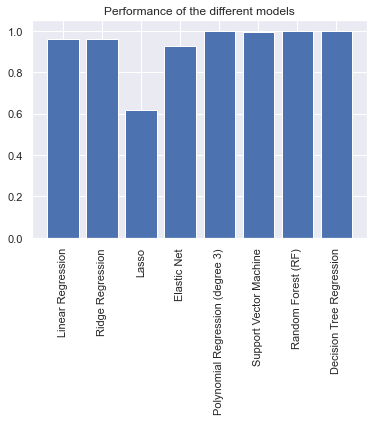

In [79]:
plt.title('Performance of the different models')

plt.bar(range(len(score_d)), 
        list(score_d.values()), 
        align='center')

plt.xticks(range(len(score_d)), 
           list(score_d.keys()), 
           rotation='vertical')

plt.show()